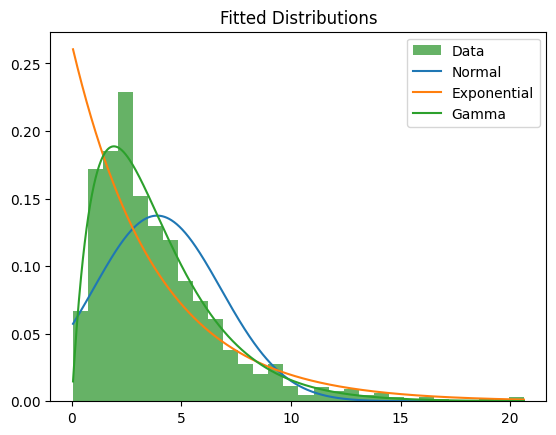

In [3]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Generate some data
data = np.random.gamma(2., 2., 1000)  # Gamma distribution

# Fit different distributions
param_norm = stats.norm.fit(data)
param_expon = stats.expon.fit(data)
param_gamma = stats.gamma.fit(data, floc=0)

# Generate the PDFs
x = np.linspace(min(data), max(data), 1000)
pdf_norm = stats.norm.pdf(x, *param_norm)
pdf_expon = stats.expon.pdf(x, *param_expon)
pdf_gamma = stats.gamma.pdf(x, *param_gamma)

# Plot the histogram and PDFs
plt.hist(data, bins=30, density=True, alpha=0.6, color='g', label='Data')
plt.plot(x, pdf_norm, label='Normal')
plt.plot(x, pdf_expon, label='Exponential')
plt.plot(x, pdf_gamma, label='Gamma')

plt.title("Fitted Distributions")
plt.legend()
plt.show()


2024-07-12 09:56:24.676 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted arcsine distribution with error=0.578412)
2024-07-12 09:56:24.680 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted anglit distribution with error=0.352238)
2024-07-12 09:56:24.708 | WARNING  | fitter.fitter:_fit_single_distribution:337 - SKIPPED _fit distribution (taking more than 30 seconds)
2024-07-12 09:56:24.739 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted alpha distribution with error=0.055319)
2024-07-12 09:56:24.749 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted bradford distribution with error=0.253753)
2024-07-12 09:56:24.765 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted argus distribution with error=0.528664)
2024-07-12 09:56:24.799 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted dweibull distribution with error=0.095843)
2024-07-12 09:56:24.804 | INFO     | fitter.fitter:_fit_single_distribution:333

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
johnsonsb,0.04447,735.790681,755.421702,inf,0.012870,0.995743
f,0.04498,731.797675,751.428696,inf,0.016882,0.933416
pearson3,0.04498,729.804272,744.527538,inf,0.016880,0.933485
gamma,0.04498,729.804504,744.527770,inf,0.016881,0.933464
erlang,0.04498,729.804752,744.528017,inf,0.016879,0.933503


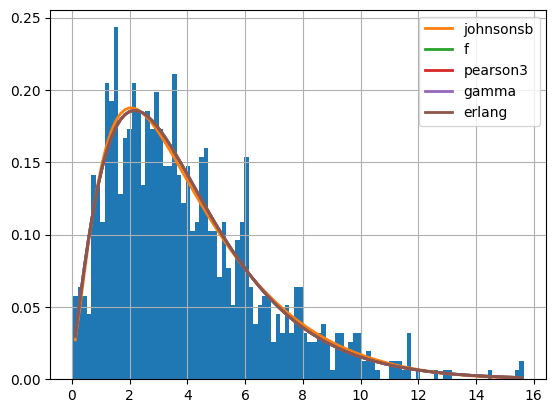

In [4]:
from fitter import Fitter

# Generate some data
data = np.random.gamma(2., 2., 1000)  # Gamma distribution

# Create a Fitter object and fit the data
f = Fitter(data)
f.fit()

# Print the summary of the best fit
f.summary()


[2.3 3.3 2.9 1.5 3.8 2.8 3.2 2.  1.  2.  3.  4.  5.  6.  4.  3.  2.  3.
 4.  1. ]


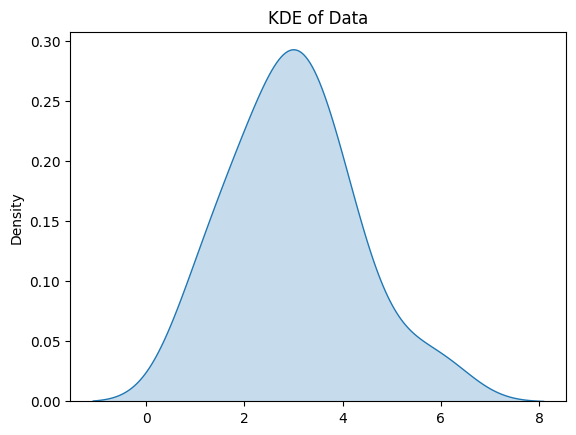

2024-07-12 10:04:45.632 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted uniform distribution with error=36.0)
2024-07-12 10:04:45.633 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted lognorm distribution with error=36.03713)
2024-07-12 10:04:45.643 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted weibull_min distribution with error=35.370477)
2024-07-12 10:04:45.661 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted chi2 distribution with error=35.339386)
2024-07-12 10:04:45.677 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted beta distribution with error=35.465649)
2024-07-12 10:04:45.681 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted t distribution with error=35.260921)
2024-07-12 10:04:46.062 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted gamma distribution with error=35.339387)


Best fitting distribution: {'t': {'df': 97.37773895655548, 'loc': 2.9845592732435766, 'scale': 1.2233779421494124}}
Best fitting distribution: t
Parameters: {'df': 97.37773895655548, 'loc': 2.9845592732435766, 'scale': 1.2233779421494124}


2024-07-12 10:04:46.619 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted expon distribution with error=36.260601)
2024-07-12 10:04:46.631 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted norm distribution with error=35.266453)


UFuncTypeError: ufunc 'subtract' did not contain a loop with signature matching types (dtype('float64'), dtype('<U3')) -> None

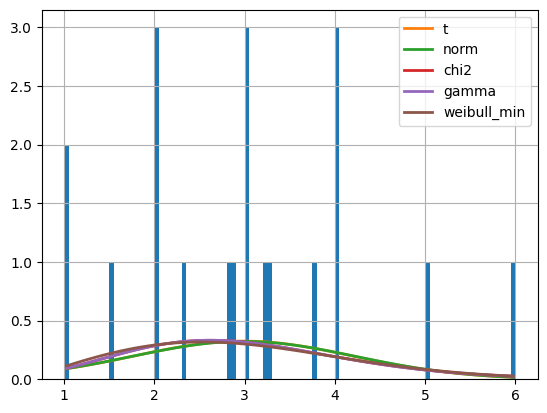

In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from fitter import Fitter
from scipy.stats import norm, expon, gamma, beta, lognorm, weibull_min, t, chi2, uniform

# Example data (replace this with your actual data)
data = np.array([2.3, 3.3, 2.9, 1.5, 3.8, 2.8, 3.2, 2.0, 1, 2, 3, 4, 5, 6, 4, 3, 2, 3, 4, 1])

# Convert to pandas Series to handle non-numeric values
data_series = pd.Series(data)

# Convert non-numeric values to NaN
data_series = pd.to_numeric(data_series, errors='coerce')

# Drop NaN values
data_series = data_series.dropna()

# Convert back to numpy array
data = data_series.to_numpy()

print(data)

# Perform KDE
sns.kdeplot(data, fill=True)
plt.title("KDE of Data")
plt.show()

# Fit the data to multiple distributions
f = Fitter(data, distributions=['norm', 'expon', 'gamma', 'beta', 'lognorm', 'weibull_min', 't', 'chi2', 'uniform'])
f.fit()

# Print the summary of the best fit
f.summary()

# Get the best-fitting distribution and its parameters
best_fit = f.get_best(method='sumsquare_error')
print("Best fitting distribution:", best_fit)

# Extract the parameters of the best-fitting distribution
best_dist_name = list(best_fit.keys())[0]
best_params = best_fit[best_dist_name]
print(f"Best fitting distribution: {best_dist_name}")
print(f"Parameters: {best_params}")

# Define the corresponding scipy.stats distribution
dist_map = {
    'norm': norm,
    'expon': expon,
    'gamma': gamma,
    'beta': beta,
    'lognorm': lognorm,
    'weibull_min': weibull_min,
    't': t,
    'chi2': chi2,
    'uniform': uniform
}

# Generate the PDF of the best-fitting distribution
x = np.linspace(min(data), max(data), 1000)
pdf_fitted = dist_map[best_dist_name].pdf(x, *best_params)

# Plot the KDE and the PDF of the best-fitting distribution
sns.kdeplot(data, fill=True, label='KDE of Data')
plt.plot(x, pdf_fitted, label=f'Best fit: {best_dist_name}')
plt.title("KDE and Best Fitting Distribution")
plt.legend()
plt.show()
